In [1]:
import sys
import os
sys.path.append('/data/GitHub/lca-tools/')

import lcatools

In [2]:
sys.path.append('..')
import lcamatrix

In [3]:
CATALOG = '/data/GitHub/lca-catalog/catalogs/'

#EI32_A = 'ecoinvent_3.2_apos_spold.json.gz'
USLCI_C = 'uslci_clean.json.gz'

In [4]:
US = lcatools.archive_from_json(os.path.join(CATALOG, USLCI_C))

Loading JSON data from /data/GitHub/lca-catalog/catalogs/uslci_clean.json.gz:
Found Extension: zip
701 new process entities added (701 total)
4176 new flow entities added (4176 total)
20 new quantity entities added (20 total)


In [5]:
from lcamatrix.uslci import uslci_allocations, uslci_flow_characterizations

In [6]:
from lcamatrix.catalog import apply_allocation, apply_flow_config

In [7]:
apply_flow_config(US, uslci_flow_characterizations)

In [8]:
US[37086].profile()

Electricity, at bleached kraft market pulp mill [Pulp, Paper, and Paperboard Mills]
 0          1                  kWh == kWh(*)EcoSpold Quantity kWh [kWh]
 1          0                  USD == kWh | EcoSpold Quantity USD [USD]


In [9]:
apply_allocation(US, uslci_allocations)

In [10]:
p = US['Paper, freesheet, coated, average production, at mill']

In [11]:
p.reference_entity

{<lcatools.exchanges.Exchange at 0x7f4d785bb278>,
 <lcatools.exchanges.Exchange at 0x7f4d785bb470>}

In [18]:
_x_gen = p.exchanges()

In [13]:
p.inventory()

Paper, freesheet, coated, average production, at mill [RNA]
 0  Input:     [15.9 [kg]] CUTOFF Disposal, wastewater treatment plant residuals, to uns. landfill [None]
 1  Input:     [55 [kg]] CUTOFF Disposal, unspecified ashes, to unspecified landfill [None]
 2  Input:     [71.8 [t*km]] Transport, pipeline, natural gas [Fossil Fuel Electric Power Generation]
 3  Input:     [0.18 [kg]] Hot rolled sheet, steel, at plant [Rolled Steel Shape Manufacturing]
 4  Input:     [4.94 [kg]] CUTOFF Disposal, unspecified ashes, to unspecified land application [None]
 5  Input:     [0.117 [m3]] CUTOFF Pulpwood, softwood, average, at forest road, US S [None]
 6  Input:     [0.549 [kg]] Hydrochloric acid, at plant  [Petrochemical Manufacturing]
 7  Input:     [0.222 [m3]] CUTOFF Pulpwood, hardwood, average, at forest road, US S [None]
 8  Input:     [5.36 [kg]] CUTOFF Disposal, solid waste, unspecified, to unspecified land application [None]
 9  Input:     [19.3 [kg]] CUTOFF Pulp, deinked market, bleach

In [19]:
next(_x_gen)

In [20]:
_.__dict__

{'_direction': 'Input',
 '_flow': <lcatools.entities.LcFlow at 0x7f47d7826240>,
 '_process': <lcatools.entities.LcProcess at 0x7f47d7f34da0>,
 '_termination': None,
 '_value': 15.876,
 '_value_dict': {<lcatools.exchanges.Exchange at 0x7f47d7f65d68>: 0.0,
  <lcatools.exchanges.Exchange at 0x7f47d7f69048>: 0.0,
  <lcatools.exchanges.Exchange at 0x7f47d7f65c88>: 0.0,
  <lcatools.exchanges.Exchange at 0x7f47d7f61e80>: 15.876,
  <lcatools.exchanges.Exchange at 0x7f47d7f65e10>: 0.0},
 'unit': <lcatools.entities.LcUnit at 0x7f47d7826fd0>}

In [20]:
next(_x_gen).__dict__

{'_direction': 'Input',
 '_flow': <lcatools.entities.LcFlow at 0x7f9e31e169b0>,
 '_process': <lcatools.entities.LcProcess at 0x7f9e316ee9b0>,
 '_termination': None,
 '_value': 0.08709,
 '_value_dict': {<lcatools.exchanges.Exchange at 0x7f9e316c7828>: 0.0,
  <lcatools.exchanges.Exchange at 0x7f9e316c74a8>: 0.0,
  <lcatools.exchanges.Exchange at 0x7f9e316c06a0>: 0.08709,
  <lcatools.exchanges.Exchange at 0x7f9e316c7588>: 0.0,
  <lcatools.exchanges.Exchange at 0x7f9e316c7630>: 0.0},
 'unit': <lcatools.entities.LcUnit at 0x7f9e31f05780>}

In [11]:
p.is_allocated(next(p.references()))

True

In [12]:
from lcamatrix.foreground import BackgroundManager

In [25]:
B = BackgroundManager(US)

In [14]:
x = p.find_reference('paper')

In [15]:
import cProfile

In [26]:
cProfile.run('B.add_ref_product(x.flow, p)')

         200811 function calls (192584 primitive calls) in 0.116 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:402(parent)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:989(_handle_fromlist)
        1    0.000    0.000    0.116    0.116 <string>:1(<module>)
     2770    0.001    0.000    0.003    0.000 <string>:12(__new__)
        4    0.000    0.000    0.000    0.000 _methods.py:25(_amax)
        2    0.000    0.000    0.000    0.000 _methods.py:28(_amin)
        3    0.000    0.000    0.000    0.000 base.py:1081(isspmatrix)
       16    0.000    0.000    0.000    0.000 base.py:181(nnz)
        1    0.000    0.000    0.000    0.000 base.py:236(asformat)
        1    0.000    0.000    0.001    0.001 base.py:253(processes)
        1    0.000    0.000    0.001    0.001 base.py:254(<listcomp>)
        4    0.000    0.000

In [27]:
len(B._cutoff)

2303

In [28]:
bg = [b.index for b in B.tstack.background_flows()]
bg_dict = dict((ind, n) for n, ind in enumerate(bg))

In [29]:
B._b_matrix == None

True

In [30]:
%time B._construct_b_matrix(bg_dict)

CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 3.85 ms


In [31]:
B._b_matrix.shape

(252, 39)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

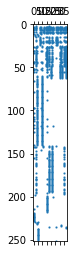

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spy(B._b_matrix, markersize=1)

In [26]:
cg = (co for co in B._cutoff if co.parent.index in bg_dict)

In [34]:
c = next(cg)

In [35]:
[c.term.index, bg_dict[c.parent.index], c.value ]

[4, 37, 4.912e-05]

In [36]:
while 1:
    c = next(cg)
    [c.term.index, bg_dict[c.parent.index], c.value ]

AttributeError: 'int' object has no attribute 'index'

In [37]:
c

MatrixEntry(parent=<lcamatrix.foreground.ProductFlow object at 0x7f38db40ac18>, term=3, value=0.0005986)

In [17]:
B.tstack._component_rows_by_col

defaultdict(set,
            {0: {1,
              40,
              41,
              42,
              53,
              60,
              62,
              70,
              80,
              102,
              104,
              110,
              111,
              114,
              115},
             1: {1},
             42: {43, 44, 45, 47, 48, 49, 50, 51, 52},
             43: {1},
             45: {46},
             47: {1},
             49: {1},
             50: {1},
             51: {1},
             52: {1},
             53: {1, 54, 55},
             54: {1, 55, 56, 57, 59},
             55: {1},
             56: {1},
             57: {1, 58},
             58: {1},
             59: {1},
             60: {1, 61},
             61: {1},
             62: {63, 68, 69},
             63: {64, 65, 66, 67},
             64: {1},
             65: {1},
             66: {1},
             67: {1},
             68: {64, 65, 66, 67},
             69: {64, 65, 66, 67},
             70: {7

In [19]:
bg = [b.index for b in B.tstack.background_flows()]

In [20]:
bg[0]

16

In [21]:
bg_dict = dict((v, k) for k, v in enumerate(bg))

In [66]:
len(bg)

39

In [34]:
353648 * .0157 / 467

11.889236830835117

In [33]:
len(B._interior)

467

In [40]:
bgf = [b.index for b in bg]

AttributeError: 'ProductFlow' object has no attribute 'index'

In [36]:
import scipy as sp

In [55]:
%time ibg = sp.array([[bg_dict[i.term.index], bg_dict[i.parent.index], i.exchange.value] for i in B._interior if i.parent.index in bg_dict])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 422 µs


In [58]:
from scipy.sparse import csc_matrix, csr_matrix

In [71]:
help(csc_matrix)

Help on class csc_matrix in module scipy.sparse.csc:

class csc_matrix(scipy.sparse.compressed._cs_matrix, scipy.sparse.sputils.IndexMixin)
 |  Compressed Sparse Column matrix
 |  
 |  This can be instantiated in several ways:
 |  
 |      csc_matrix(D)
 |          with a dense matrix or rank-2 ndarray D
 |  
 |      csc_matrix(S)
 |          with another sparse matrix S (equivalent to S.tocsc())
 |  
 |      csc_matrix((M, N), [dtype])
 |          to construct an empty matrix with shape (M, N)
 |          dtype is optional, defaulting to dtype='d'.
 |  
 |      csc_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
 |          where ``data``, ``row_ind`` and ``col_ind`` satisfy the
 |          relationship ``a[row_ind[k], col_ind[k]] = data[k]``.
 |  
 |      csc_matrix((data, indices, indptr), [shape=(M, N)])
 |          is the standard CSC representation where the row indices for
 |          column i are stored in ``indices[indptr[i]:indptr[i+1]]``
 |          and their correspondin

In [73]:
%time asp = csc_matrix((ibg[:,2], (ibg[:,0], ibg[:,1])))

CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 621 µs


In [96]:
asp[3,0] = -7

/data/virtualenvs/lca-tools/lib/python3.6/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [97]:
asp[:,0].todense()

matrix([[  0.00000000e+00],
        [  0.00000000e+00],
        [  3.25086652e-02],
        [ -7.00000000e+00],
        [  5.15192793e-02],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  1.11796836e-03],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  4.55945622e-04],
        [  2.35958299e-01],
        [  6.90358342e-03],
        [  0.00000000e+00],
        [  5.92471712e-05],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.0000000

In [93]:
B.product_flow(bg[37])._process['Name']

'Liquefied petroleum gas, combusted in industrial boiler'

In [91]:
pf = B.product_flow(bg[0])

In [92]:
pf._process.inventory(pf._flow)

Reference: Residual fuel oil, at refinery [Petroleum Refineries]
 0  Input:     [4.72e-05 [l]] Liquefied petroleum gas, combusted in industrial boiler [Steam and Air-Conditioning Supply]
 1  Input:     [0.0325 [t*km]] Transport, pipeline, unspecified petroleum products [Fossil Fuel Electric Power Generation]
 2  Input:     [0.0515 [kg]] Crude oil, at production [Crude Petroleum and Natural Gas Extraction]
 3  Input:     [0.0069 [kWh]] Electricity, at grid, US, 2000 [Electric Power Distribution]
 4  Input:     [5.92e-05 [t*km]] Transport, barge, average fuel mix [Inland Water Freight Transportation]
 5  Input:     [0.000279 [kg]] CUTOFF Disposal, solid waste, unspecified, to sanitary landfill [None]
 6  Input:     [0.236 [t*km]] Transport, ocean freighter, average fuel mix [Deep Sea Freight Transportation]
 7  Input:     [0.00112 [l]] Residual fuel oil, combusted in industrial boiler [Steam and Air-Conditioning Supply]
 8  Input:     [0.000456 [m3]] Natural gas, combusted in industrial 

In [18]:
US.ref

'/home/b/Dropbox/data/USLCI/USLCI_Processes_ecospold1.zip'

In [19]:
len(F._product_flows)

122

In [29]:
len(F._cutoff)

2303

In [33]:
F.tstack._sccs

defaultdict(set,
            {('01728546-2342-34df-86b7-65fe9343aee2',
              '00eb0c00-ddb6-36f3-bf16-c447f6cabcdb'): {<lcamatrix.foreground.ProductFlow at 0x7f4d795a6b00>},
             ('01880cc7-8807-32a7-9007-81a80a1a91da',
              '3c593e41-0e50-31ef-a566-ec11ea5643d3'): {<lcamatrix.foreground.ProductFlow at 0x7f4d79a33f28>},
             ('065fa0d5-7072-33c1-8cb0-150567c907e3',
              '8d485ea1-981d-3e56-aee8-eed19959bf97'): {<lcamatrix.foreground.ProductFlow at 0x7f4d79a1b9b0>,
              <lcamatrix.foreground.ProductFlow at 0x7f4d79a1b128>},
             ('095c5b40-2161-3d87-821c-96ae74e97491',
              'ca5e5040-2f2d-327f-8403-7c8e1602d912'): {<lcamatrix.foreground.ProductFlow at 0x7f4d795a6390>},
             ('09e9a749-f9b2-3073-a1a6-a11ea75cdd62',
              '500719f8-0940-3ddd-bbd6-6ad3728e2e7b'): {<lcamatrix.foreground.ProductFlow at 0x7f4d79a33898>},
             ('0af8b9ef-d32e-3526-8dba-a5d4185cf8f1',
              'e436e12c-54a1-32e9-8d

In [43]:
sccs = list(F.tstack.sccs)

In [44]:
len(sccs)

84

In [53]:
len(F._product_flows)

122

In [57]:
F._product_flows

{<lcamatrix.foreground.ProductFlow at 0x7f4d79bc2978>: 0,
 <lcamatrix.foreground.ProductFlow at 0x7f4d795bd7b8>: 1,
 <lcamatrix.foreground.ProductFlow at 0x7f4d79bc29e8>: 2,
 <lcamatrix.foreground.ProductFlow at 0x7f4d798a6630>: 3,
 <lcamatrix.foreground.ProductFlow at 0x7f4d798b5080>: 4,
 <lcamatrix.foreground.ProductFlow at 0x7f4d798b5128>: 5,
 <lcamatrix.foreground.ProductFlow at 0x7f4d798b57b8>: 6,
 <lcamatrix.foreground.ProductFlow at 0x7f4d798b5828>: 7,
 <lcamatrix.foreground.ProductFlow at 0x7f4d798b5ef0>: 8,
 <lcamatrix.foreground.ProductFlow at 0x7f4d798b5f60>: 9,
 <lcamatrix.foreground.ProductFlow at 0x7f4d798b5fd0>: 10,
 <lcamatrix.foreground.ProductFlow at 0x7f4d79a1b080>: 11,
 <lcamatrix.foreground.ProductFlow at 0x7f4d79a1b0b8>: 12,
 <lcamatrix.foreground.ProductFlow at 0x7f4d79a1b128>: 13,
 <lcamatrix.foreground.ProductFlow at 0x7f4d79a1b198>: 14,
 <lcamatrix.foreground.ProductFlow at 0x7f4d79a1b208>: 15,
 <lcamatrix.foreground.ProductFlow at 0x7f4d79a1b278>: 16,
 <lcama

In [69]:
i = 0
f = 0
for pf, ll in F._lowlink.items():
    i += 1
    if F.index(pf) != ll:
        f += 1


In [66]:
F.index(ig[0][0])

0

In [35]:
len(SCC)

39

In [39]:
sorted([str(k._process) for k in SCC])

['Bituminous coal, at mine [RNA]',
 'Bituminous coal, combusted in industrial boiler [RNA]',
 'Crude oil, at production [RNA]',
 'Crude oil, in refinery [RNA]',
 'Crude oil, in refinery [RNA]',
 'Crude oil, in refinery [RNA]',
 'Crude oil, in refinery [RNA]',
 'Diesel, combusted in industrial boiler [RNA]',
 'Diesel, combusted in industrial equipment [RNA]',
 'Electricity, at Grid, US, 2008 [RNA]',
 'Electricity, at grid, US, 2000 [RNA]',
 'Electricity, biomass, at power plant [RNA]',
 'Electricity, bituminous coal, at power plant [RNA]',
 'Electricity, diesel, at power plant [RNA]',
 'Electricity, lignite coal, at power plant [RNA]',
 'Electricity, natural gas, at power plant [RNA]',
 'Electricity, nuclear, at power plant [RNA]',
 'Electricity, residual fuel oil, at power plant [RNA]',
 'Fuel grade uranium, at regional storage [RNA]',
 'Gasoline, combusted in equipment [RNA]',
 'Lignite coal, at surface mine [RNA]',
 'Lignite coal, combusted in industrial boiler [RNA]',
 'Liquefied pe

In [19]:
len(F.sccs)

84

In [25]:
len(F._cutoff)

2303

In [88]:
import scipy as sp

NameError: name 'SCC' is not defined